# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


# Reading the dataset


### From the following dataset it's clear all the values are categorical data type and inorder to get it 
### precessed into ML models we need to convert into numerical values.
### Hence we shall proceed with encoding the dataset

In [2]:
df = pd.read_csv("D:/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Preprocessing

# Encoding the dataset


### I have used LabelEncoder as we have only 2 classes in outputs.
### Also because, we have more than 23 columns, going with one hot encoding is not an ideal option.

### I would then then not only be encoding the values as mentioned but also store the corresponding categorical values in "mappings_dict" dictionary which would then be passed to "mappings" list

In [3]:
mappings = []

encoder = LabelEncoder()

for column in range(len(df.columns)):
    df[df.columns[column]] = encoder.fit_transform(df[df.columns[column]])
    mappings_dict = {index:label for index, label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [5]:
df.info()

# Now we can see all the data types of the values are converted to int and we have 8124 non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

In [6]:
df["class"].value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [7]:
df.isnull().sum()

# From this step we know that there are no null / NaN values for any columns / features

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
df.describe()

# The count value is perfect and there's no missing value
# Also the variation between mean and standard deviation is mininal.

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


## Correlation

#### Let us now check for correlation between the features vs features
#### Since there are too many rows and columns, I have not included heatmap to avoid congestion

In [9]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


### Corelation of the target column (in our dataset "class" is the target column)

#### Values are displayed from large to small for ease of reference

In [10]:
corr_matrix = df.corr()
corr_matrix["class"].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

# Distribution of all the columns in the dataset

### we can observe that the data is normally distributed and doesn't seem to be a problem to process further.
### A "for loop" is appiled to create "distplot" across all the features

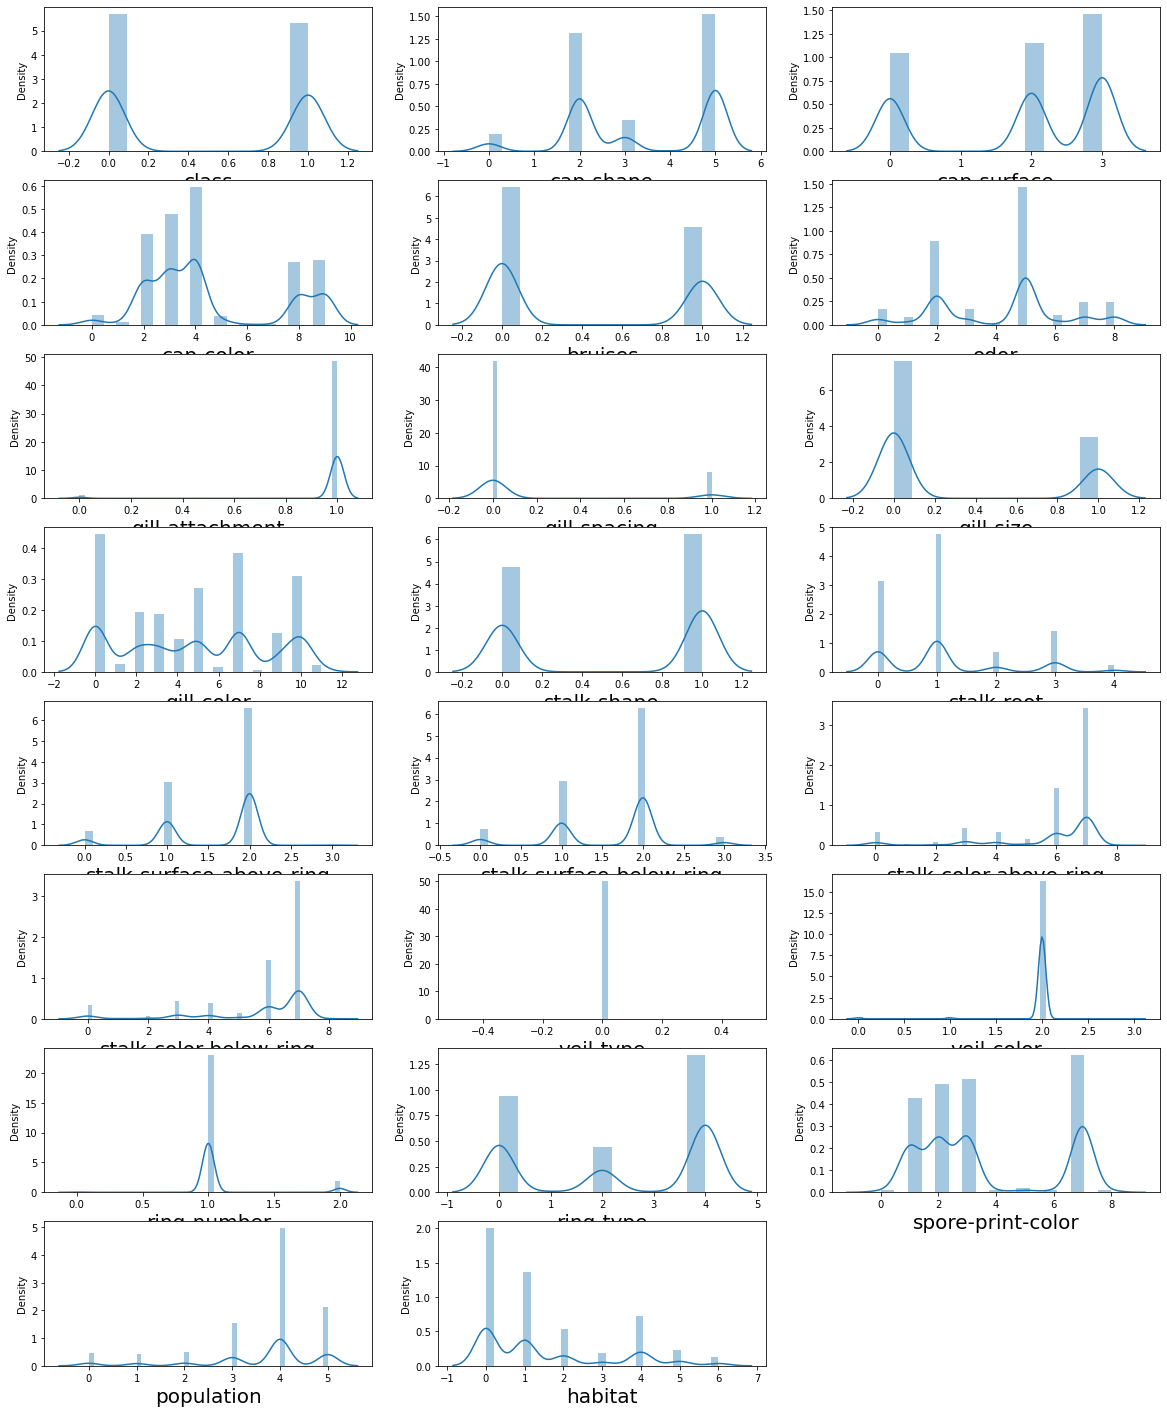

In [11]:
#lets see how data is distributed for every column

plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=23:
        ax = plt.subplot(8,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()
    

# Splitting up of dataset with x (features) and y (target column)

In [12]:
# splitting the columns

x = df.drop(columns = ["class"])
y = df["class"]

### Check for skewness of the dataset

#### There is no point in checking skewness for target variable as its the final output. Hence we shall check for skewness in data for column x

In [13]:
x.skew()

cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

# Distribution of feature vs target column

### I have created a "stripplot" to determine the relationship between all the features with the target column "class"

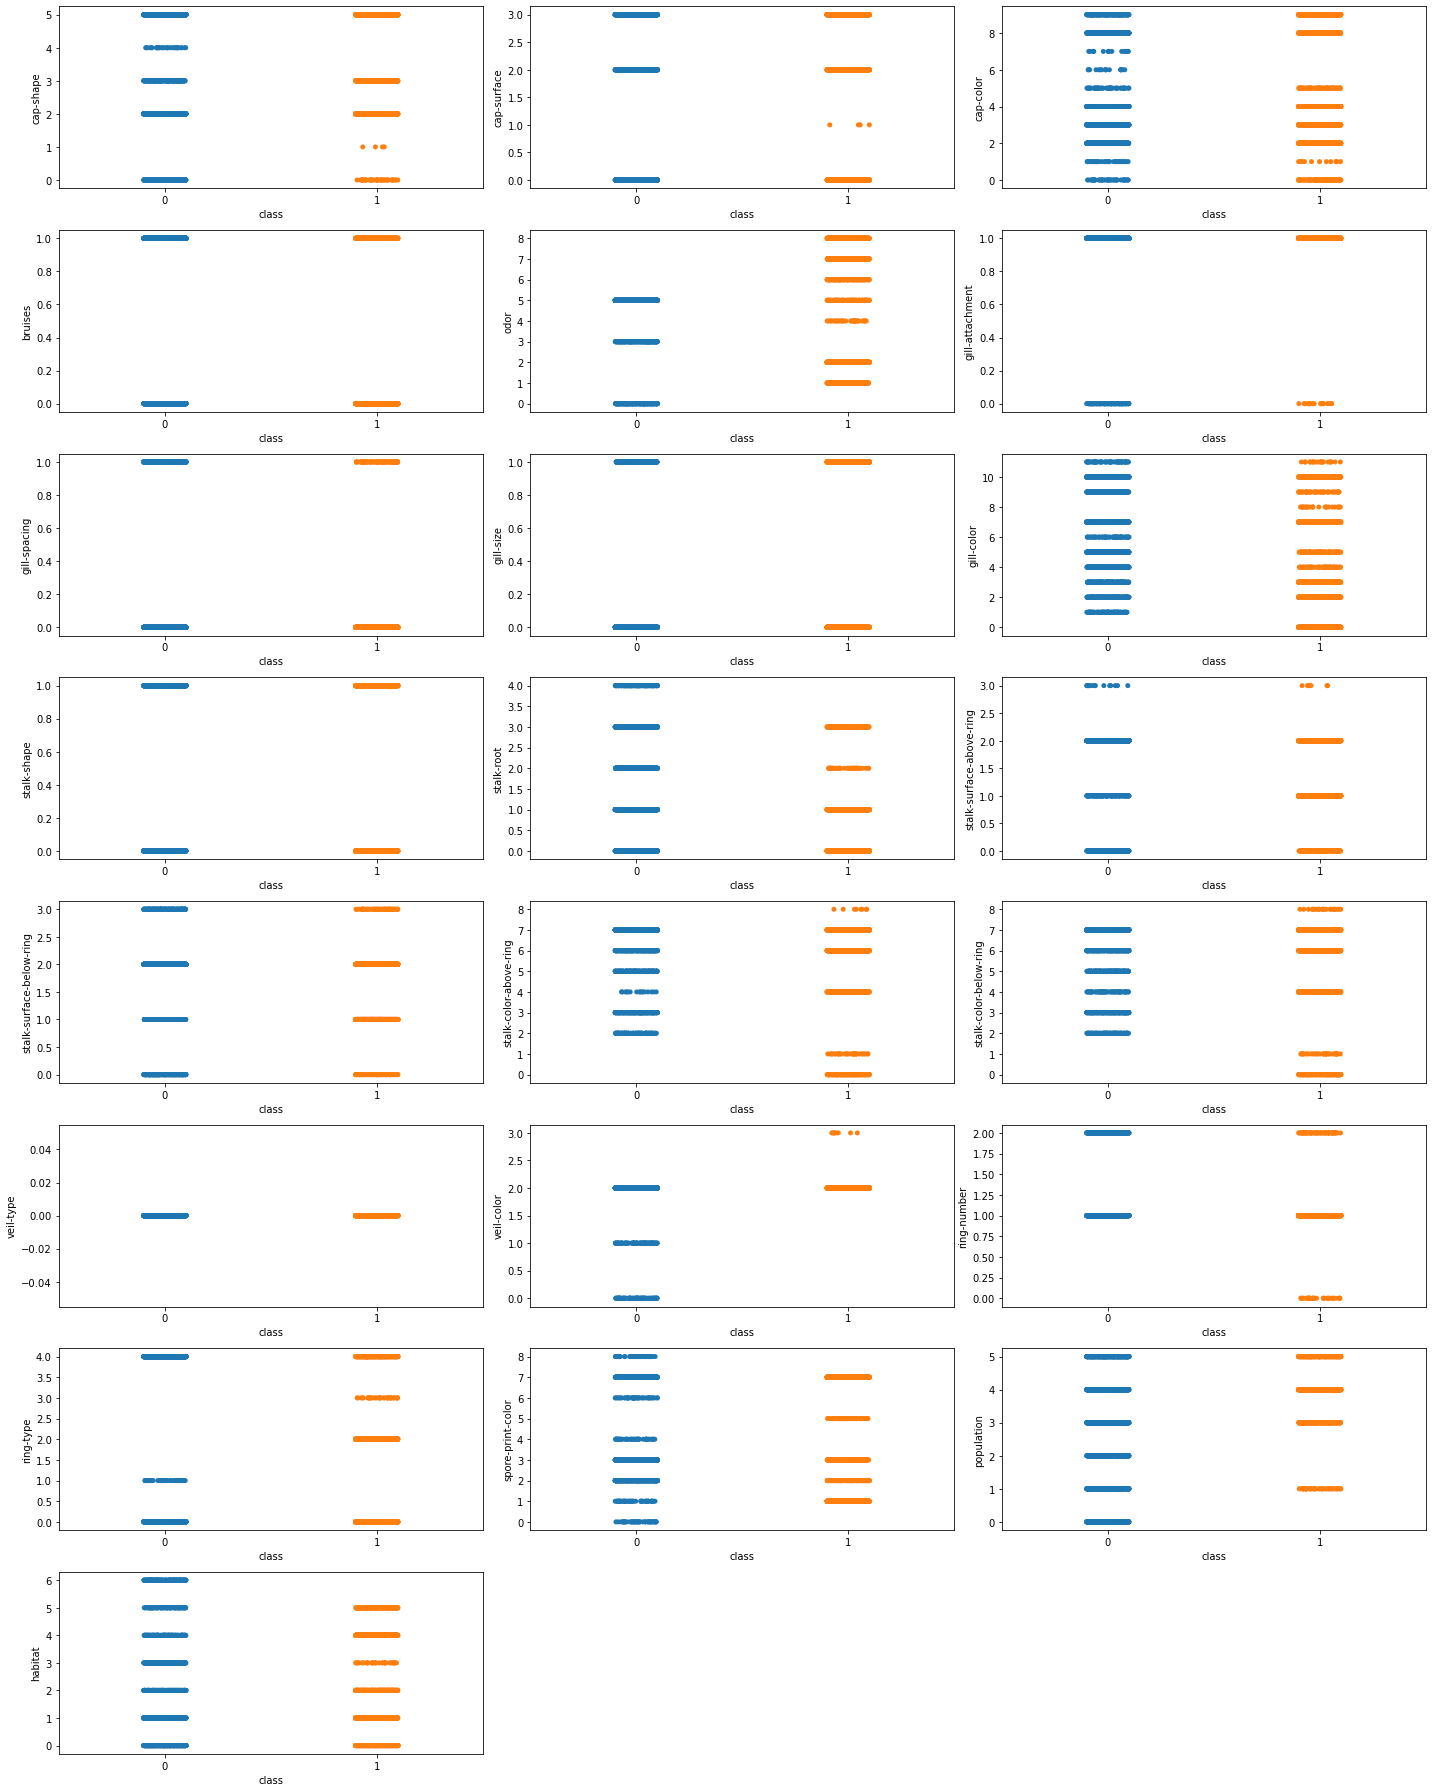

In [14]:
#lets see how data is distributed for every column (feature vs label)

plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in x:
    if plotnumber <=23:
        ax = plt.subplot(8,3, plotnumber)
        sns.stripplot(y, x[column])
    plotnumber+=1
plt.tight_layout()

# Lets us now Scale the data for further processing.

## I am using StandardScaler in this scenario

In [15]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [16]:
x_scaled

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

# Finding variance inflation factor in each scaled column

## This gives us relationship between feature vs feature and we can drop if necessary to avoid multicolinearity

#### From the below observation, it appears the features "bruises" and "gill-attachment" have high variances compared to others features. Hence I shall drop one to improve the efficay of the model

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor( x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.043031,cap-shape
1,1.254300,cap-surface
2,1.566327,cap-color
3,6.172082,bruises
4,1.839415,odor
5,6.956323,gill-attachment
6,4.107406,gill-spacing
7,3.995689,gill-size
8,2.294605,gill-color
9,4.640069,stalk-shape


#### I have dropped "gill-attachment" as its correlation with respect to target class is less

In [18]:

x = x.drop(columns = ["gill-attachment"])


### The Variation_inflation_factor of "bruises" is somewhat reduced than before

In [19]:

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor( x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.042497,cap-shape
1,1.251711,cap-surface
2,1.557389,cap-color
3,6.021783,bruises
4,1.806410,odor
5,4.105003,gill-spacing
6,3.783023,gill-size
7,2.263814,gill-color
8,4.524099,stalk-shape
9,3.995238,stalk-root


# Check if the dataset is over sampling or under sampling

In [20]:
df["class"].value_counts()

0    4208
1    3916
Name: class, dtype: int64

## I will proceed with SMOTE technique for Over Sampling of dataset

### Although very few amount of values are imbalanced, I would still consider it to be imbalanced dataset 

In [21]:
#Handling class imbalance problem ny oversampling the moinority class

from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over, y_over = SM.fit_resample(x,y)

#### Balanced dataset after SMOTE

In [22]:
y_over.value_counts()

0    4208
1    4208
Name: class, dtype: int64

## Finding the best random state for the implementation of ML model

### I will also proceed with LogisticRegression as the out has only 2 classes

In [23]:
# Finding the best random_state

from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS=0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    y_pred = LR.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS = i
        
print("The best accuracy is ",maxAccu,"on Random State",maxRS)   

The best accuracy is  0.9651485148514851 on Random State 180


#### From the above function its clear that 180 is the best random state in this scenario


# split the dataset into train and test data set

#### test_size value is same as above (30%) and random_state refers to teh output of "maxRS" variable as calculated in the previous step

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.30, random_state = maxRS)

# Utilize certain number of algorithms to get better output

### 1) LogisticRegression

In [25]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

y_pred = log_reg.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9651485148514851
[[1246   36]
 [  52 1191]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1282
           1       0.97      0.96      0.96      1243

    accuracy                           0.97      2525
   macro avg       0.97      0.97      0.97      2525
weighted avg       0.97      0.97      0.97      2525



### 2) DecisionTreeClassifier 

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[1282    0]
 [   0 1243]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1282
           1       1.00      1.00      1.00      1243

    accuracy                           1.00      2525
   macro avg       1.00      1.00      1.00      2525
weighted avg       1.00      1.00      1.00      2525



### 3) RandomForestClassifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[1282    0]
 [   0 1243]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1282
           1       1.00      1.00      1.00      1243

    accuracy                           1.00      2525
   macro avg       1.00      1.00      1.00      2525
weighted avg       1.00      1.00      1.00      2525



### 4) SVC 

In [28]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

y_pred = svc.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9908910891089109
[[1281    1]
 [  22 1221]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1282
           1       1.00      0.98      0.99      1243

    accuracy                           0.99      2525
   macro avg       0.99      0.99      0.99      2525
weighted avg       0.99      0.99      0.99      2525



# Cross validation to check if its overfitting

#### From the above outputs, both DecisionTreeClassifier and RandomForestClassifier have 100% accuracy.
#### This could be a reason for overfitting and hence cross validation is performed as showen below

In [29]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(log_reg, x, y, cv=5)
print("Cross Validation score of LogisticRegression model is:", scr.mean())

Cross Validation score of LogisticRegression model is: 0.8447655172413793


In [30]:
scr = cross_val_score(dt, x, y, cv=5)
print("Cross Validation score of DecisionTree model is:", scr.mean())

Cross Validation score of DecisionTree model is: 0.9606056839712013


In [31]:
scr = cross_val_score(rf, x, y, cv=5)
print("Cross Validation score of RandomForestClassifier model is:", scr.mean())

Cross Validation score of RandomForestClassifier model is: 0.9035908298597954


In [32]:
scr = cross_val_score(svc, x, y, cv=5)
print("Cross Validation score of SVC model is:", scr.mean())

Cross Validation score of SVC model is: 0.841415308829102


# Selecting the best ML model for this dataset

### Its clear that we should proceed with LogisticRegression as the difference is lower compared to other models

| Models used | Model Accuracy | Cross Validation | Difference output |
| --- | --- | --- |---|
| LogisticRegression | 0.965148515 | 0.844765517 | 0.120382998 |
| DecisionTreeClassifier | 100 | 0.960605684 | 99.03939432 |
| RandomForestClassifier | 100 | 0.90359083 | 99.09640917 |
| SVC | 0.990891089 | 0.841415309 | 0.14947578 |




# Hyper Parameter Tuning

### Let us try to tune the proposed model (LogisticRegression) to get better accuracy, if possible

##### The "paramaters" have been selected from the skicit library and I have considered 4 paramaters

In [44]:
from sklearn.model_selection import GridSearchCV

parameters = {"penalty": ["l1","l2","elasticnet"],
              "class_weight": ["dict", "balanced"],
              "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
              "multi_class": ["auto", "ovr", "multinomial"]}


### GridSearchCV is used to tune the parameters by fitting the same to the training dataset

In [45]:
GCV = GridSearchCV(LogisticRegression(), parameters, cv=5)

In [46]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': ['dict', 'balanced'],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [47]:
GCV.best_params_

{'class_weight': 'balanced',
 'multi_class': 'ovr',
 'penalty': 'l1',
 'solver': 'liblinear'}

### Rebuild the model using the appropriate params we recieved from best_params_


#### Its observed that the model accuracy was approximately 96.51 % earlier and post Hyper Parameter tuning its now approximately 97.66% better 

In [48]:
mod = LogisticRegression(class_weight="balanced",multi_class="ovr",penalty="l1", solver="liblinear")

mod.fit(x_train,y_train)
pred = mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

97.66336633663366


# Saving the model (using joblib)

In [49]:
# Svaing the model

import joblib
joblib.dump(mod,"Mushroom_Dataset.pkl")

['Mushroom_Dataset.pkl']

# Loading the saved model

In [50]:
model = joblib.load("Mushroom_Dataset.pkl")

In [40]:
prediction = model.predict(x_test)

In [52]:
prediction=pd.DataFrame(prediction)
prediction

,0
0,0
1,1
2,0
3,1
4,1
...,...
2520,0
2521,1
2522,0
2523,1
